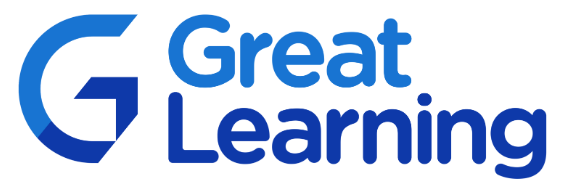


Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

------
# <font color='blue'> Titanic Data Analysis using</font> <font color='Green'>Visualization</font>
------


## <font color='blue'> Table Of Contents </font>

- ### <font color='blue'> 1. Basic data exploration
- ### <font color='blue'> 2. Basic Plots in matplotlib
- ### <font color='blue'> 3. Statistical Plots in matplotlib
- ### <font color='blue'> 4. Distribution Plot in Seaborn
- ### <font color='blue'> 5. Categorical Plots in Seaborn
- ### <font color='blue'> 6. Relational Plots in Seaborn
- ### <font color='blue'> 7. Multiple grid in Seaborn   
- ### <font color='blue'> 8. Visualization using Plotly
-------------------

<font size=4 color='Green'> **Objective:** </font>
<font size=3> Let us explore the Titanic dataset by performing data analysis using visualization.
We will implement different plots supported by matplotlib and seaborn on the titanic data and derive some meaningful insights.

<font size=4 color='green'>  **Dataset:** </font> <font size=3>Titanic data
    
<font size=4 color='green'>  **Dataset source:**</font> https://www.kaggle.com/datasets/brendan45774/test-file
    
<font size=4 color='green'>  **Attribute Information**</font>
- Survived: Outcome of survival (0 = No; 1 = Yes)
- Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- Name: Name of passenger
- Sex: Sex of the passenger
- Age: Age of the passenger (Some entries contain NaN)
- SibSp: Number of siblings and spouses of the passenger aboard
- Parch: Number of parents and children of the passenger aboard
- Ticket: Ticket number of the passenger
- Fare: Fare paid by the passenger
- Cabin: Cabin number of the passenger (Some entries contain NaN)
- Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)
---------------------

<font color='Green' size=4>  **Import required libraries**</font>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings

<font color='Green' size=4>  **Load the dataset**

In [2]:
df = pd.read_csv('Titanic+Data+Set.csv')

<font color='Green' size=4>  **1. Explore the data** </font>

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()*100/len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [9]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [10]:
df.drop(['Cabin'],axis=1,inplace=True)

In [11]:
df.isnull().sum()*100/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
dtype: float64

In [21]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [22]:
df.isnull().sum()*100/len(df)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [23]:
df.drop(['PassengerId'],axis=1,inplace=True)

In [24]:
df.drop(['Name'],axis=1,inplace=True)

In [26]:
df.drop(['Ticket'],axis=1,inplace=True)

KeyError: "['Ticket'] not found in axis"

In [27]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [30]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

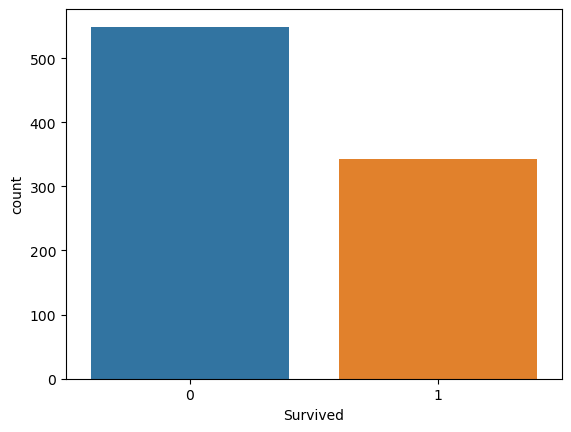

In [29]:
# Let's check the count of target variable
sns.countplot(x = 'Survived', data = df)
plt.show()

In [32]:
# Creating an instance of the label encoder class
le = LabelEncoder()

# label encoding all the categorical columns that have more than 2 unique values
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [34]:
df.head()   #Dataset after encoding the catagorical data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [36]:
# Dividing Dataset into Training and Test Set
# independent variables
X = df.iloc[:,1:].values
# dependent variable
y = df.iloc[:,0].values

In [37]:
# train_test_split() is used to divide dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [38]:
# declaring an object of standardscaler class
sc = StandardScaler()

# fit_transform() method first trains the Scaler on dataset and then transforms it between 0 and 1
X_train = sc.fit_transform(X_train)

# transform() method only transforms the dataset based on what it has learnt on the dataset before
X_test = sc.transform(X_test)

In [39]:
# Create an instance
log_reg = LogisticRegression()
# Training
log_reg.fit(X_train,y_train)

LogisticRegression()

In [44]:
# Check for prediction results
y_pred = log_reg.predict(X_test)

In [45]:
# Print the intercept of the model and the coefficients of the features
print('Intercept of the logistic model fitted is: ',log_reg.intercept_)
print('Coefficients of the features are: ',log_reg.coef_)

Intercept of the logistic model fitted is:  [-0.65896277]
Coefficients of the features are:  [[-0.86658565 -1.39551302 -0.38683115 -0.39177484 -0.02587362  0.10490767
  -0.20998319]]


In [46]:
# Below code to show the column name along with the coefficient of the logistic model.

X = df.drop('Survived', axis = 1)
# Create lists
column_labels = X.columns.tolist()
coef = log_reg.coef_.squeeze().tolist()

# Zip together
labels_coef = list(zip(column_labels, coef))

# Verify the result
print(labels_coef)

[('Pclass', -0.8665856487720429), ('Sex', -1.395513018361129), ('Age', -0.38683115066960105), ('SibSp', -0.3917748399403988), ('Parch', -0.025873621984403773), ('Fare', 0.1049076723548586), ('Embarked', -0.20998318539032207)]


In [47]:
# Check for accuray of the model
accuracy_score(y_test,y_pred)

0.753731343283582

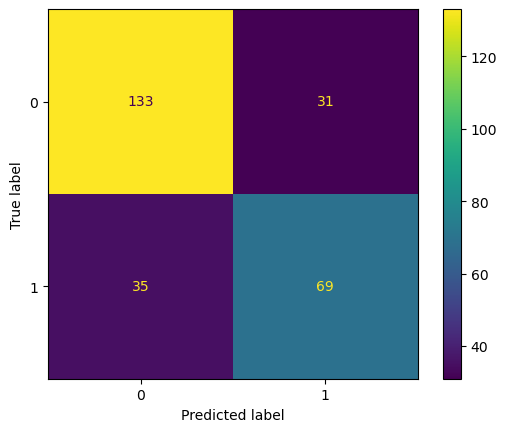

In [48]:
## Confusion matrix
from sklearn .metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

<font size=3> Q1. From which port the maximum number of people boarded the titanic? Use an appropriate plot.

#### <font color='green'> **2.1 Bar Plots** </font>
- Barplot helps to understand and compare the data distribution of different levels in a variable
- Creates the levels of the data with rectangular bars with lengths and heights that is equivalent to the values which they represent.
- The bars can be plotted horizontally or vertically

In [ ]:
emp=df['Embarked'].value_counts()
sns.barplot(x=emp.index,y=emp.values)
plt.title('Embarked')
plt.show()


In [ ]:
emp=df['Embarked'].value_counts()
plt.bar(x=emp.index,height=emp.values,color=['green','blue','red'])

plt.show()


<font size=3> Q2. Visualize the relationship between ticket fare paid and age of the passengers using scatter plot and write your inferences.

#### <font color='green'> **2.2 Scatter Plots** </font>
- Scatterplot is a classic and most commonly used plot to study the relationship between two random variables
- It helps to understand the correlation between the variables 

In [ ]:
sns.scatterplot(x=df["Age"], y=df["Fare"], data=df)
plt.show()

<font color='Green' size=4> **3. Statistical plots in matplotlib** </font>

<font size=3>  Q3. Check the distribution of age of the passengers using Histplot.

#### <font color='green'> **3.1 Histplot** </font>
- Histoplot helps in visualizing the discrete or continuous data
- It divides the entire range of data into a series of intervals(bins) and then represents the count of values in those intervals 

In [ ]:
sns.histplot(df, x="Age",color='green',bins=12)
plt.show()

<font size=3> Q4. Check the percentage of the male and female passengers boarded the titanic.


#### <font color='Green'> 3.2 Pie Plot </font>
- Pieplot is a circular statistical plot.
- It is divided into slices to represent the different categorical levels.
- It displays the percentage of observations of the different category level in a variable.

In [ ]:
gender=df['Sex'].value_counts()
plt.pie(gender,labels=['male','female'],autopct='%.1f%%')#labels=['male','female'] or x.index
plt.show()

<font size=3> Q5. Check the statistical summary of the column 'Fare' using Boxplot and write your findings.

#### <font color='Green'> 3.3 Box Plots </font>
- Boxplot helps in visualizing the data distribution of a variable 
- Box plots are important in statistical analysis because they let you see the distrubution of a data set at a glance, including outliers. 

In [ ]:
sns.boxplot(df["Fare"]) 
plt.show()

<font color='Green' size=4> **4. Distribution Plots in Seaborn** </font>

<font size=3> Q6. Visualize the column age of passengers using displot.

#### <font color='Green'> 4.1 displot </font>
- Displot helps in understanding the variation in the data distribution. 
- It also provides access to several approaches for visualizing the distribution of data.
- histplot() is the default kind of plot when displot() function is called.
- KDE is the kernel Density Estimator and can be plotted by specifying the parameter kde="true".

In [ ]:
sns.displot(df["Age"],kde=True)
plt.show()

<font color='Green' size=4> **5. Categorical Plots in Seaborn** </font>

<font size=3> Q7. Count the number of passengers in different classes using appropriate plot.

#### <font color='Green'> 5.1 countplot </font>
- Countplot displays the number of observations in each categorical level using the bars.
- It is Similar to bar plot.
- The count plots can be plotted horizontally or vertically.

In [ ]:
cx = sns.countplot(x="Pclass",data=df)#for vertical, replace x to y
plt.ylabel('no of passengers')
for i in cx.containers:#For labels in each bars(only for bar and count)
    cx.bar_label(i,)
plt.show()

<font size=3> Q8. Visualize the survival rate both is males and females using catplot and write your inferences.

#### <font color='Green'> 5.2 catplot() </font>
- Catplot helps to visualise the categorical data much efficiently. 
- It can be used for analysis between categorical features and a numerical feature.
- Can be used to plot multiple plots like count, box, strip, swarm by changing the ‘kind’ argument 

In [ ]:
sns.catplot(x="Sex", y="Age",data=df,kind='strip',hue='Survived')
plt.show()

<font color='Green' size=4> **6. Relational Plots in Seaborn** </font>

<font size=3> Q9. Check the distribution of the males and females among different ticket classes.

#### <font color='Green'> relplot() </font>
- Relplot helps to understand the complicated comparisons much easier. 
- It can be used for analysis between categorical features and a numerical feature.
- By default the type of the plot is scatterplot() .We can change the type of the plot by changing the ‘kind’ parameter.

In [ ]:
sns.relplot(x='Age',y='Fare',col='Pclass',hue='Sex',style='Sex',kind='line',data=df)
plt.show()

<font size=3> Q10. Visualize and analyse the relationship between Ticket classes, Survivial rate, and Gender of the passengers using appropriate plot

In [ ]:
sns.relplot(x='Age',y='Fare',col='Pclass',hue='Sex',row='Survived',style='Sex',kind='scatter',data=df)
plt.show()

<font color='Green' size=4> **7. Multiple Grid in Seaborn** </font>

<font size=3> Q11. Check the death rate with respect to age of the passengers and three different ticket classes

#### <font color='Green'> 7.1 facetgrid() </font>
- Creates multiple instances of the same plot on different subsets of the data. Input data must be in a dataframe format
- Facet grid forms a matrix of panels defined by row and column by dividing the variables. 
- Due to these panels, a single plot looks like multiple plots. 
- It is very helpful to analyze all combinations in two discrete variables.

In [ ]:
s=sns.FacetGrid(df,col='Survived',row='Pclass')
s.map(plt.hist,'Age')
s.add_legend()
plt.show()

 <font size=3> Q12. Visualize the multiple pairwise bivariate distribution using appropriate plot and write your inferences.


#### <font color='Green'> 7.2 pairplot() </font>
- Creates an axis grid and each variable is represented on y-axis and x- axis
- Pairwise relationship is represented through scatter plots
- Distribution is shown through displot
- Unlike FacetGrid, it uses different pair of variable for each subplot.

In [ ]:
sns.pairplot(df, hue='Survived',kind='scatter',palette='husl')
plt.show()

<font color='Green' size=4> **8. Plotly** </font>

- The plotly Python library is an interactive, open-source plotting library
- It supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases
- Built on top of the Plotly JavaScript library (plotly.js), plotly enables Python users to create beautiful interactive web-based visualizations that can be displayed in Jupyter notebooks, saved to standalone HTML files, or served as part of pure Python-built web applications using Dash
- The plotly Python library is sometimes referred to as "plotly.py" to differentiate it from the JavaScript library

In [ ]:
import plotly.express as px

#### <font color='Green'> 8.1 Scatter plot </font>

In [ ]:
fig=px.scatter(x=[0,2,4,6,8],y=[0,4,16,36,64])
fig.show()

In [ ]:
fig1=px.scatter(df,x='Age',y='Fare',color='Sex')
fig1.show()

In [ ]:
fig3 = px.scatter(x =df['Fare'], y =df['Name'], color =df['Pclass'], 
                 animation_frame =df['Survived'])
fig3.show()

#### <font color='Green'> 8.2 Histogram </font>

In [ ]:
tips_df = px.data.tips()
fig = px.histogram(tips_df, x = "total_bill", y = "tip", color = "sex", marginal = "rug",
                   hover_data = tips_df.columns)
fig.show()

In [ ]:
fig_1 = px.histogram(tips_df, x = "total_bill", y = "tip", color = "sex",
                   marginal = "box", hover_data = tips_df.columns)
fig_1.show()

#### <font color='Green'> 8.3 Boxplot </font>

In [ ]:
fig = px.box(tips_df, y = "total_bill")
fig.show()

In [ ]:
fig = px.box(tips_df, x="time", y="total_bill",color='sex')
fig.show()

----------
### Happing Learning :)
---------